# Intro

The dataset we'll use describes Euro daily exchange rates between 1999 and 2023. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it in February 2024.

In [1]:
# importing pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

In [2]:
# Reading in the dataset and understanding the structure
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

## Focus on the Rouble

Our focus in the guided part of the project will be on the exchange rate between the Euro and the Russian Rouble.
Also let's clean up the data so we can focus more on the graph part of this project.

In [3]:
# Renaming the columns, changing the data type and sorting out time

exchange_rates.rename(columns={'[Russian rouble ]': 'Russian_rouble',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Isolating columns

euro_to_rouble = exchange_rates[['Time','Russian_rouble']].copy()

In [5]:
#checking if there are any missing values 

euro_to_rouble['Russian_rouble'].value_counts()

-          62
40.5950     4
40.6500     4
39.6750     4
43.9800     4
           ..
43.5830     1
49.8640     1
74.8589     1
72.2447     1
90.0519     1
Name: Russian_rouble, Length: 5705, dtype: int64

In [6]:
# dropping the rows where '-' character appears and converting the column to float
euro_to_rouble = euro_to_rouble[euro_to_rouble['Russian_rouble'] != '-']
euro_to_rouble['Russian_rouble'] = euro_to_rouble['Russian_rouble'].astype(float)

# grabbing more precise timing by isolating year and month

euro_to_rouble['Year_Month'] = euro_to_rouble['Time'].dt.to_period('M')

Let's generate a line plot to visualize the evolution of the euro-rouble exchange rate.

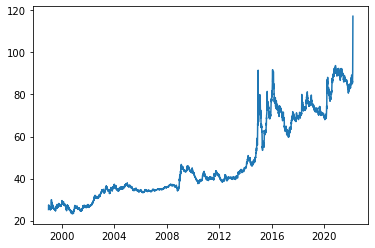

In [7]:
plt.plot(euro_to_rouble['Time'], euro_to_rouble['Russian_rouble'])
plt.show()

Let's clean up the graph a little to make it more smooth and understandable

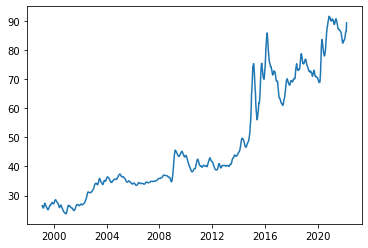

In [8]:
# figuring out the rolling mean of 30 days and showing it in the graph
euro_to_rouble['rolling_mean'] = euro_to_rouble['Russian_rouble'].rolling(30).mean()
plt.plot(euro_to_rouble['Time'],euro_to_rouble['Russian_rouble'].rolling(30).mean())
plt.show()

Let's see how euro-rouble rate has changed during the start of the sanctions in 2014 and the consequent struggles and the war in Ukraine. We'll take the period of 2014 to the end of 2022. Unfortunately, there is no data provided for euro-rouble exchange rate in 2023.

In [9]:
# Grabbing the necessary data
sanctions = euro_to_rouble.copy()[(euro_to_rouble['Time'].dt.year >= 2014) & (euro_to_rouble['Time'].dt.year <= 2023)]

peak = euro_to_rouble.copy()[(euro_to_rouble['Year_Month'] >= '2020-09') & (euro_to_rouble['Year_Month'] <= '2020-12')]

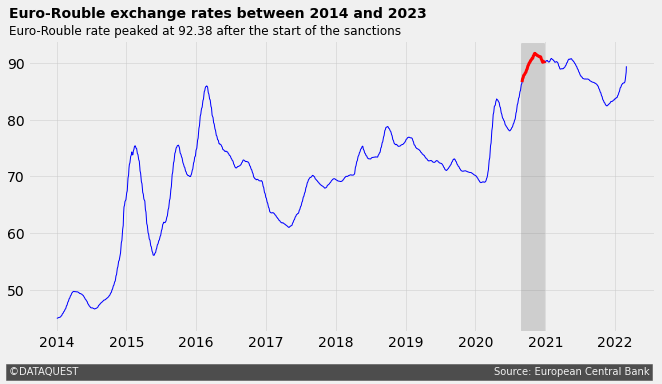

In [10]:
# Importing the style
style.use('fivethirtyeight')

# Adding the plot
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sanctions['Time'],
        sanctions['rolling_mean'],
        linewidth=1, color='b')


# Highlight the years

ax.plot(peak['Time'],
        peak['rolling_mean'],
        linewidth=3, color='r')

# Highlight the peak

ax.axvspan(xmin=18500, xmax=18620, ymin=0.00, ymax=0.99,
           alpha=0.3, color='grey')


# Adding a title and a subtitle    
ax.text(15820, 98, "Euro-Rouble exchange rates between 2014 and 2023",
        weight='bold')
ax.text(15820, 95, 'Euro-Rouble rate peaked at 92.38 after the start of the sanctions',
        size=12)

# Adding a signature
ax.text(15820, 35, '©DATAQUEST' + ' '*133 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## Conclusion
In October of 2023 the ruble’s exchange rate came under additional pressure from declining crude oil prices and numerous geopolitical concerns. The unrest in Belarus and the poisoning of opposition leader Alexei Navalny (RIP in 2024) increased the likelihood of new sanctions against Russian entities or persons. The thawing of the frozen Nagorno-Karabakh conflict between Armenia and Azerbaijan and recent unrest in the wake of the Kyrgyzstan presidential election have further increased uncertainty throughout the region, threatening Russia’s economic prospects. All this comes before the US election next month, as well as the upcoming Tajikistan and Moldova presidential elections and Georgia’s parliamentary elections.